## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# __Importing Pandas/Numpy/Zipfile__

In [2]:
# importing pandas, numpy and zipfile
import zipfile
import pandas as pd
import datetime
import numpy as np
from dateutil.relativedelta import relativedelta
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import font_manager


# __Data #1 - TV Movies Budget (from class - box office mogo)__

In [3]:
## opening read file
budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz',compression='gzip')

In [4]:
## removing $ and , from Production Budget and and changing type to integer

budget['production_budget'] = budget['production_budget'].str.replace('$', '')
budget['production_budget'] = budget['production_budget'].str.replace(',', '')
budget['production_budget'] = budget['production_budget'].astype(int)

## removing $ and , from Domestic Gross and and changing type to integer

budget['domestic_gross'] = budget['domestic_gross'].str.replace('$', '')
budget['domestic_gross'] = budget['domestic_gross'].str.replace(',', '')
budget['domestic_gross'] = budget['domestic_gross'].astype(int)

## removing $ and , from Worldwide Gross and changing type to integer

budget['worldwide_gross'] = budget['worldwide_gross'].str.replace('$', '')
budget['worldwide_gross'] = budget['worldwide_gross'].str.replace(',', '')
budget['worldwide_gross'] = budget['worldwide_gross'].astype(int)

In [5]:
# creating new column release year

budget['release_year'] = pd.DatetimeIndex(budget['release_date']).year

In [6]:
# changing type of release Date to datetime

budget['release_date'] = pd.to_datetime(budget['release_date'])

In [7]:
# converting 'release_date' column type from integer to datetime

budget['release_date'] = pd.to_datetime(budget['release_date'])

In [8]:
# renaming movie column to title
budget = budget.rename(columns = {"movie":"title"})

# _Data #1  - analyzing TV movies Budget_

In [9]:
#finding datset age range and ranges 105 years

oldest_movie = min(budget['release_date'])
newest_movie = max(budget['release_date'])
movie_range = relativedelta(newest_movie, oldest_movie).years

print(oldest_movie)
print(newest_movie)
print(movie_range)

1915-02-08 00:00:00
2020-12-31 00:00:00
105


In [11]:
##defining and sorting top 20 grossing movies

top_gross_movies = budget.sort_values(by="worldwide_gross",ascending=False).head(20)
top_gross_movies


,id,release_date,title,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,1997
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,2015
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,2012
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,2018
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,2011


# Data Source #2 - Top Rated Movies - pulled from TMBD API

In [34]:
import requests
import pandas as pd


# creating loop to pull 4000 records from top rated movies
# set page numbers
page = 1
total_pages = 400

# empty list
data_list = []

# loop to iterate
while page <= total_pages:
    # make a request to the API with the current page number
    response = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=a88e9a2c082e4caa0a1447a81f7e743b&language=en-US&page=' + str(page))

    # response
    data = response.json()['results']
    
    #append data to list
    data_list.append(data)

    #increase page number
    page += 1

In [89]:
# pulling keys

response.json().keys()

dict_keys(['page', 'results', 'total_pages', 'total_results'])

In [90]:
# concatenate the data into a pandas DataFrame -

top_movies = pd.concat([pd.DataFrame(data) for data in data_list], ignore_index=True)

In [91]:
#reindexing dataframe

top_movies = top_movies .reset_index(drop=True)

In [92]:
# split the list into columns
split_movies = top_movies ['genre_ids'].apply(pd.Series)

#renaming the columns
split_movies = split_movies.rename(columns=lambda x: f'col_{x+1}')

# add the new columns back to top_rated DataFrame
top_movies = pd.concat([top_movies, split_movies], axis=1)

In [93]:
#dropping null values

top_movies.dropna(axis=0, how='any', subset=['title'], inplace=True)

In [97]:
#dropping columns that aren't needed

top_movies = top_movies.drop(['adult', 'backdrop_path', 'genre_ids', 'poster_path', 'video',
                          'original_language', 'overview','col_7', 'col_8', 'col_9'], axis=1)

In [98]:
#renaming the genre columns
top_movies.rename(columns = {'col_1':'genre_id_1','col_2':'genre_id_2','col_3':'genre_id_3',
                            'col_4':'genre_id_4', 'col_5':'genre_id_5', 'col_6':'genre_id_6'}, inplace = True)

In [99]:
##changing N/A variables to 0

top_movies = top_movies.fillna(0)

In [101]:
top_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8000 non-null   int64  
 1   original_title  8000 non-null   object 
 2   popularity      8000 non-null   float64
 3   release_date    8000 non-null   object 
 4   title           8000 non-null   object 
 5   vote_average    8000 non-null   float64
 6   vote_count      8000 non-null   int64  
 7   genre_id_1      8000 non-null   float64
 8   genre_id_2      8000 non-null   float64
 9   genre_id_3      8000 non-null   float64
 10  genre_id_4      8000 non-null   float64
 11  genre_id_5      8000 non-null   float64
 12  genre_id_6      8000 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 875.0+ KB


In [102]:
# converting  column type from float64 to int

top_movies[['genre_id_1','genre_id_2','genre_id_3','genre_id_4','genre_id_5','genre_id_6']] = top_movies[['genre_id_1','genre_id_2','genre_id_3','genre_id_4','genre_id_5','genre_id_6']].astype(int)

In [103]:
# changing title type to string
top_movies['title'] = top_movies['title'].astype('str')

In [104]:
##converting 'release_date' column type from integer to datetime

top_movies['release_date'] = pd.to_datetime(top_movies['release_date'])

In [105]:
# information about first and last movie entry in data

first_movie = min(top_movies['release_date'])
last_movie = max(top_movies['release_date'])

print(first_movie)
print(last_movie)

1895-06-10 00:00:00
2023-03-01 00:00:00


# Data Source #2  - Analyzing & Visualizing

In [106]:
top_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8000 non-null   int64         
 1   original_title  8000 non-null   object        
 2   popularity      8000 non-null   float64       
 3   release_date    8000 non-null   datetime64[ns]
 4   title           8000 non-null   object        
 5   vote_average    8000 non-null   float64       
 6   vote_count      8000 non-null   int64         
 7   genre_id_1      8000 non-null   int64         
 8   genre_id_2      8000 non-null   int64         
 9   genre_id_3      8000 non-null   int64         
 10  genre_id_4      8000 non-null   int64         
 11  genre_id_5      8000 non-null   int64         
 12  genre_id_6      8000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(8), object(2)
memory usage: 875.0+ KB


In [107]:
# creating df of most popular films by popularity

most_popular = top_movies.sort_values(by='popularity',ascending=False).head(20)

In [108]:
# creating new dataframe with only the top genres

top_genres = top_movies[['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']].apply(pd.Series.value_counts)

In [109]:
# changing N/A variables to 0
top_genres = top_genres.fillna(0)

In [110]:
# creating a genre total column that sums up the total values and making it a integer
top_genres['genre_total'] = top_genres.sum(axis=1)

In [111]:
# dropping first row
top_genres.drop([0],inplace=True)

In [112]:
# creating column with the genre names

top_genres['genre_name'] = ['Adventure','Fantasy','Animation','Drama','Horror',
                            'Action','Comedy','History','Western','Thriller',
                            'Crime','Science Fiction', 'Mystery', 'Music','Romance',
                            'Family', 'War', 'TV Movie']

top_genres

,genre_id_1,genre_id_2,genre_id_3,genre_id_4,genre_id_5,genre_id_6,genre_total,genre_name
12,452,425,250,90,24,5.0,1246.0,Adventure
14,172,270,230,155,59,6.0,892.0,Fantasy
16,506,241,104,15,4,2.0,872.0,Animation
18,2144,1411,483,112,15,2.0,4167.0,Drama
27,457,212,109,32,6,3.0,819.0,Horror
28,934,476,193,63,18,7.0,1691.0,Action
35,1526,753,345,112,26,2.0,2764.0,Comedy
36,44,237,148,44,5,0.0,478.0,History
37,65,28,20,14,3,2.0,132.0,Western
53,346,659,625,216,40,3.0,1889.0,Thriller


In [113]:
top_genres['percent'] = ((top_genres['genre_total'] / top_genres['genre_total'].sum()) * 100)


In [114]:
# creating new df with only the genre ids to graph

top_genres_total= top_genres.drop(columns=['genre_id_1', 'genre_id_2','genre_id_3','genre_id_4',
                                          'genre_id_5','genre_id_6'])

In [115]:
##changing order of the columns

top_genres_total = top_genres_total [['genre_name', 'genre_total']]

In [116]:
top_genres_total = top_genres_total.sort_values(by='genre_total',ascending=False).head(20)

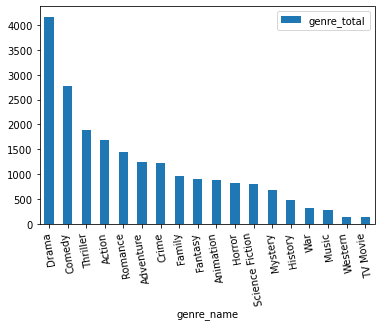

In [117]:
ax = top_genres_total.plot.bar(x='genre_name', y='genre_total', rot=100)

plt.rcParams['figure.dpi'] = 200

# Data Source #2 -  Analyzing Subgenres

In [118]:
# ADVENTURE DRAMA

# https://stackoverflow.com/questions/19125091/pandas-merge-how-to-avoid-duplicating-columns

#genre 1 - ADVENTURE

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - DRAMA
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([12]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_12 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_12.drop([i for i in merged_genre_18_12.columns if 'remove' in i],
               axis=1, inplace=True)

In [119]:
# COMEDY DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - COMEDY
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([35]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_35 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_35.drop([i for i in merged_genre_18_35.columns if 'remove' in i],
               axis=1, inplace=True)

In [120]:
# FANTASY DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - FANTASY
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([14]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_14 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_14.drop([i for i in merged_genre_18_14.columns if 'remove' in i],
               axis=1, inplace=True)

In [121]:
# ROMANCE DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - ROMANCE
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([10749]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_10749 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_10749.drop([i for i in merged_genre_18_10749.columns if 'remove' in i],
               axis=1, inplace=True)

In [122]:
# ACTION DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - ACTION
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([28]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_28 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_28.drop([i for i in merged_genre_18_28.columns if 'remove' in i],
               axis=1, inplace=True)

In [123]:
# CRIME DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - CRIME
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([80]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_80 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_80.drop([i for i in merged_genre_18_80.columns if 'remove' in i],
               axis=1, inplace=True)

In [124]:
# THRILLER DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([18]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - FANTASY
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([53]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_18_53 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_18_53.drop([i for i in merged_genre_18_53.columns if 'remove' in i],
               axis=1, inplace=True)

In [145]:
# ANIMATION DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([35]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - ANIMATION
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([16]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_35_16 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_35_16.drop([i for i in merged_genre_35_16.columns if 'remove' in i],
               axis=1, inplace=True)

In [ ]:
# ANIMATION DRAMA

#genre 1 - DRAMA

genre_columns_one = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_one = top_movies[genre_columns_one].isin([35]).any(axis=1)
top_sub_genres_one = top_movies[sub_genre_one]
top_sub_genres_one

#genre 2 - ANIMATION
genre_columns_two = ['genre_id_1','genre_id_2', 'genre_id_3', 'genre_id_4', 'genre_id_5', 'genre_id_6']
sub_genre_two = top_movies[genre_columns_two].isin([16]).any(axis=1)
top_sub_genres_two = top_movies[sub_genre_two]
top_sub_genres_two

#merge based on title

merged_genre_35_16 = pd.merge(top_sub_genres_one,top_sub_genres_two, on="title", how="inner",left_index=True,
                           right_index=True, suffixes=('', '_remove'))
 
# remove the duplicate columns
merged_genre_35_16.drop([i for i in merged_genre_35_16.columns if 'remove' in i],
               axis=1, inplace=True)

In [148]:
# creating new dataframe with lenths of sub-genres
genre_data = [len(merged_genre_18_12.index), len(merged_genre_18_35.index),
              len(merged_genre_18_14.index), len(merged_genre_18_10749.index), len(merged_genre_18_28.index),
              len(merged_genre_18_80.index),len(merged_genre_18_53.index),len(merged_genre_35_10749.index), len(merged_genre_35_16.index)]

genre_data_graph = pd.DataFrame(genre_data, columns = ['genre_total'])

# naming the columns based on the genre keys
no_drama = ['Adventure Drama', 'Comedy Drama', 'Fantasy Drama', 'Romance Drama', 'Action Drama','Crime Drama','Thriller Drama',
           'Comedy-Romance', 'Animation Drama']

genre_data_graph['genre_name'] = no_drama

# re-arranging column position
moving_genre = genre_data_graph.pop('genre_name')
  
genre_data_graph.insert(0, 'genre_name', moving_genre)

In [150]:
# sorting by genre total
sub_genre_sorted = genre_data_graph.sort_values(by='genre_total',ascending=False)
sub_genre_sorted

,genre_name,genre_total
3,Romance Drama,988
1,Comedy Drama,956
6,Thriller Drama,923
7,Comedy-Romance,709
5,Crime Drama,687
4,Action Drama,501
8,Animation Drama,355
0,Adventure Drama,291
2,Fantasy Drama,234


In [144]:
genre_sum = sub_genre_sorted['genre_total'].sum()
genre_sum 

5289

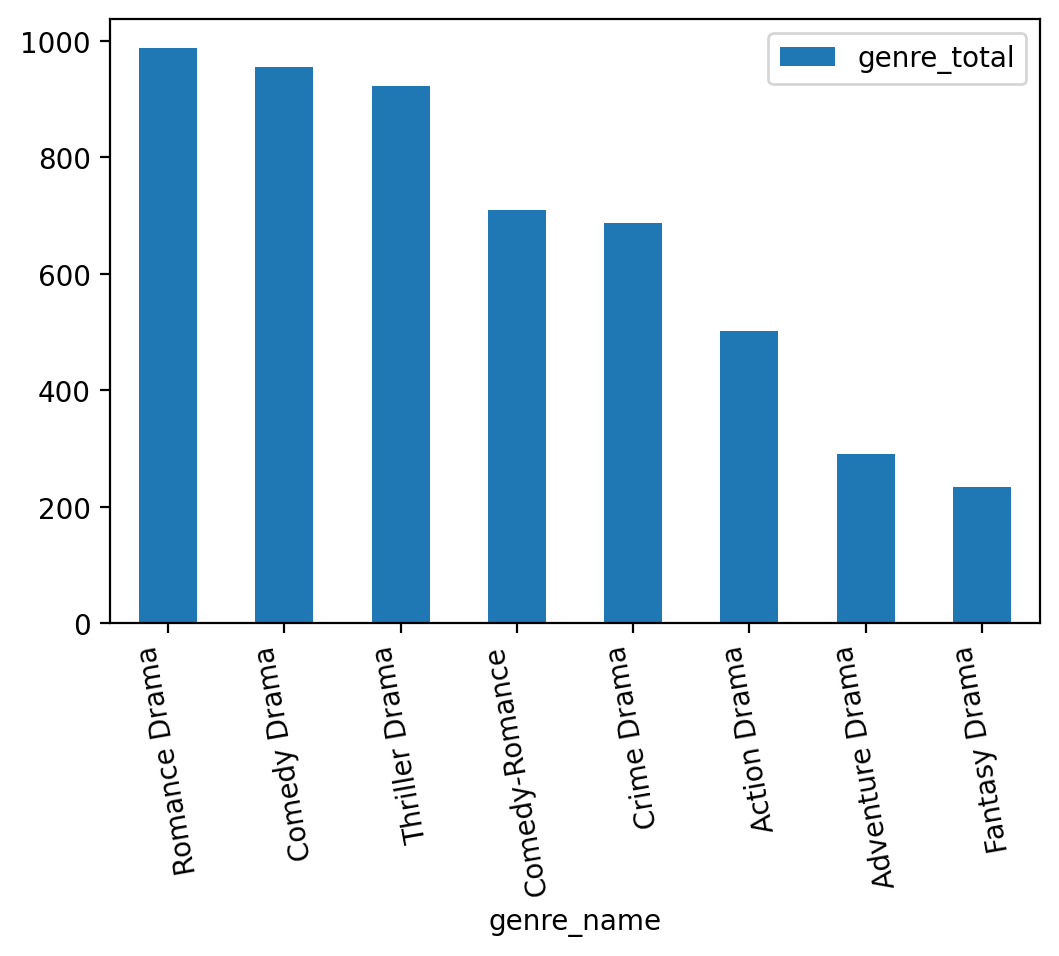

In [128]:
sub_genre_graph = sub_genre_sorted.plot.bar(x='genre_name', y='genre_total', rot=100)

# Data Source #2   - Looking at genres without 'Drama"

In [129]:
#creating dataframe from main top_genres and removing "drama" category as this might skew the data

top_genres_no_drama = top_genres_total

top_genres_no_drama = top_genres_no_drama.tail(-1)
top_genres_no_drama 

,genre_name,genre_total
35,Comedy,2764.0
53,Thriller,1889.0
28,Action,1691.0
10749,Romance,1447.0
12,Adventure,1246.0
80,Crime,1214.0
10751,Family,964.0
14,Fantasy,892.0
16,Animation,872.0
27,Horror,819.0


In [186]:
# creating percentage colum to represent breakdown of categories and rounding the floats

genre_breakdown = top_genres_no_drama

genre_breakdown['percent'] = ((genre_breakdown['genre_total'] / genre_breakdown['genre_total'].sum() * 100))
genre_breakdown.percent = genre_breakdown.percent.round(2)

<ipython-input-186-7e6002e968a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_breakdown['percent'] = ((genre_breakdown['genre_total'] / genre_breakdown['genre_total'].sum() * 100))
/Users/stephanie/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [169]:
# making dataframe with top 5

genre_top5 = genre_breakdown.head(5)

In [171]:
# resestting index

genre_breakdown = genre_breakdown.reset_index()
genre_breakdown.rename(columns = {'genre_name':'Genre'}, inplace = True)
genre_breakdown.rename(columns = {'percent':'Market Share %'}, inplace = True)

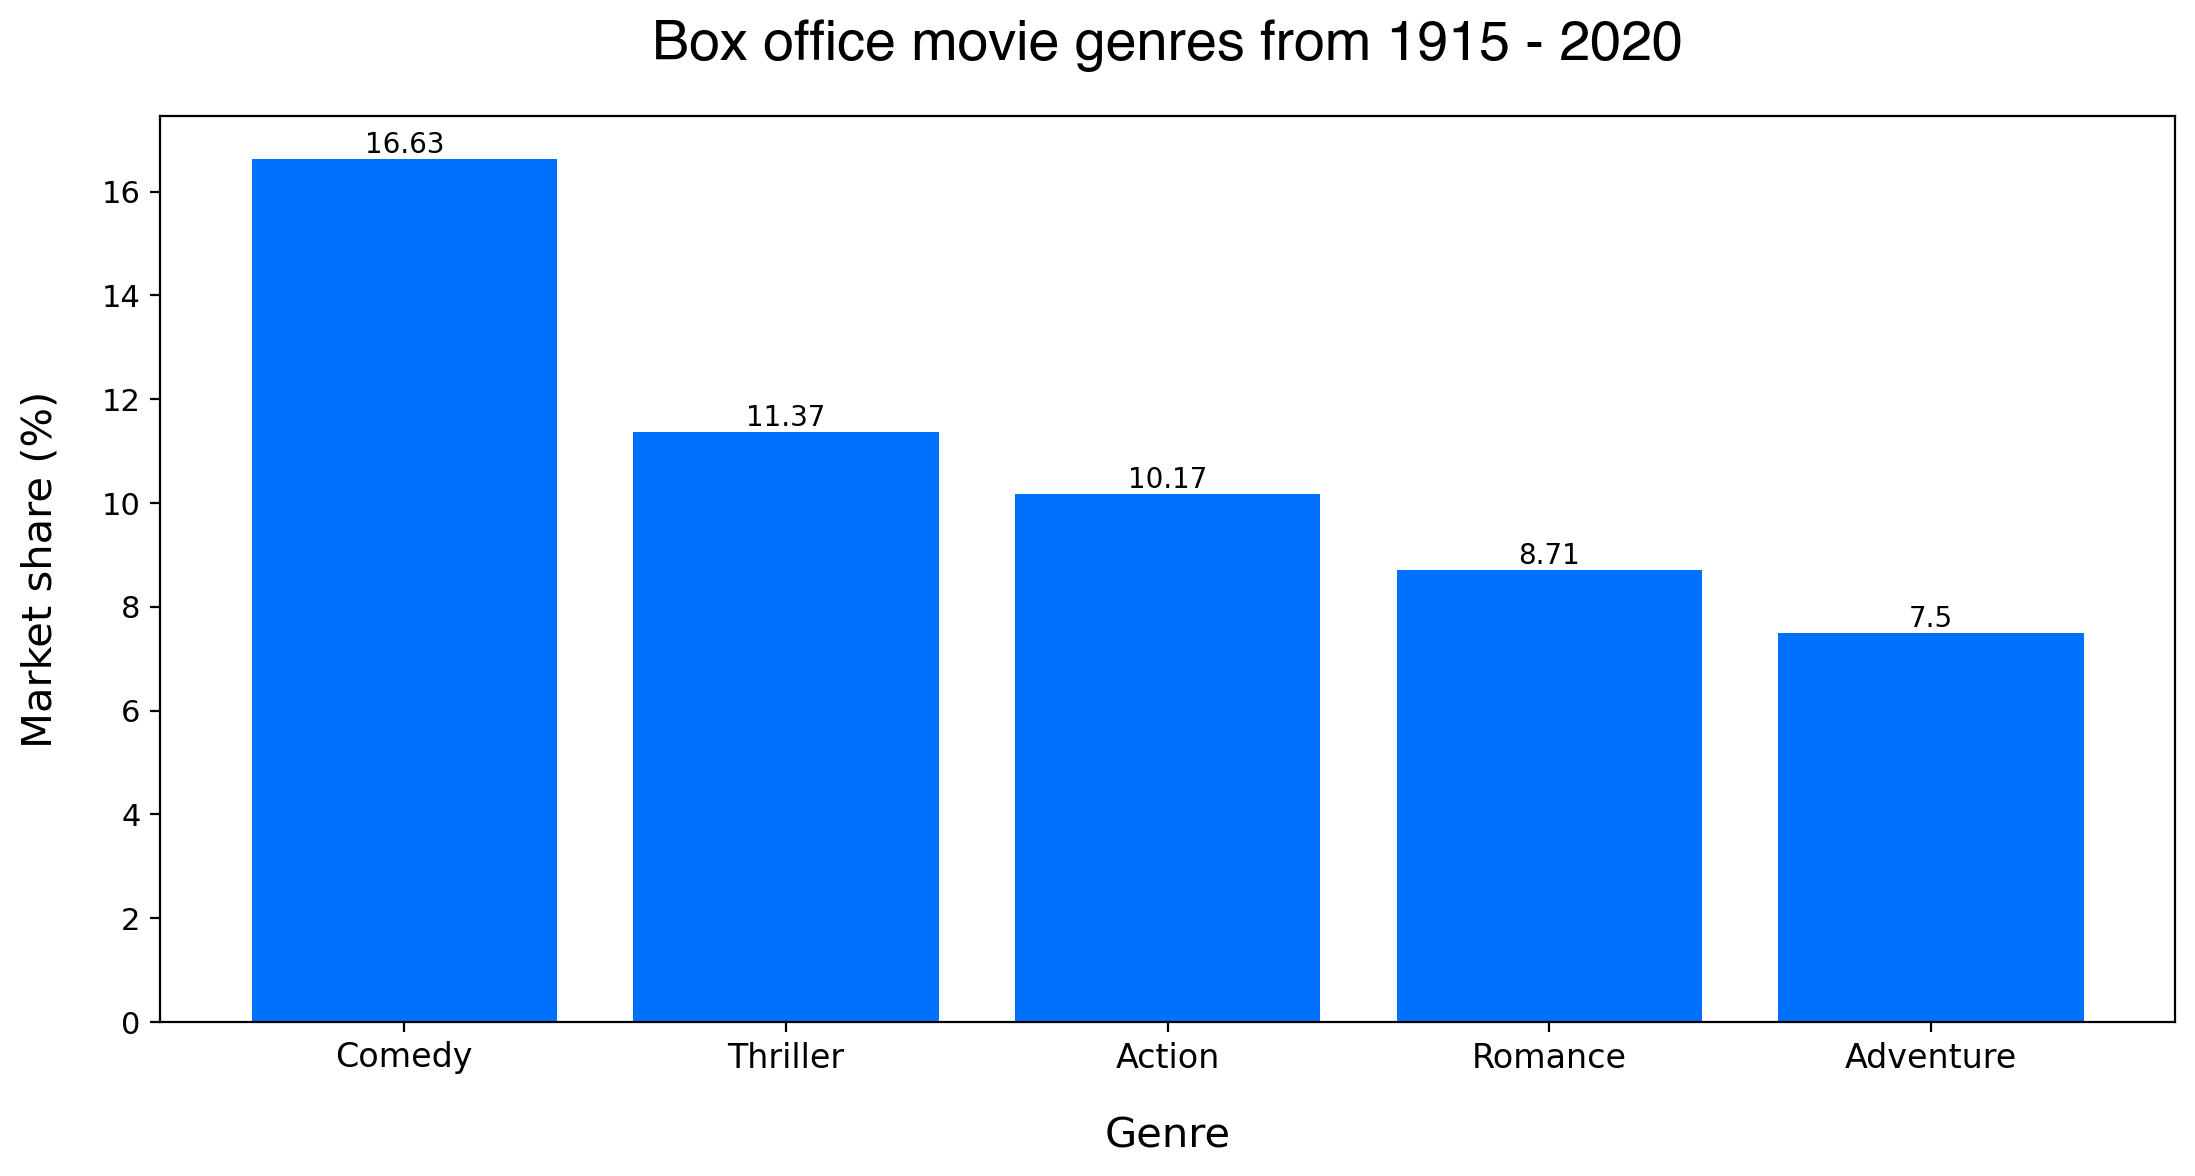

In [187]:
# creating x and y
x = genre_top5['genre_name']
y = genre_top5['percent']

# resizing & design
fig = plt.figure(figsize=(13, 6))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=11)
rfont = {'fontname':'helvetica'}

# setting labels
plt.title('Box office movie genres from 1915 - 2020',**rfont, fontdict = {'fontsize' : 20, 'fontweight': 100} , pad = 20
         )
plt.xlabel('Genre',labelpad = 15, fontdict = {'fontsize' : 15} )
plt.ylabel('Market share (%)', labelpad = 15, fontdict = {'fontsize' : 15})

# making the bar
genre_graph = plt.bar(x, y,color=('#0071ff'))

for bar in genre_graph:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')


# Data Source #4 -  Box office revenue by genre - Numbers.com

In [223]:
#downloaded table from website and created .csv file

genre_data = pd.read_csv('top-movie-genres-by-total-box-office-revenue.csv')

In [224]:
genre_data_sorted = genre_data.head(5)
genre_data_sorted

,Unnamed: 0,Genre,Movies,Total Box Office,Tickets,Share
0,1,Adventure,1154,65881158656,9365637164,0.27
1,2,Action,1171,54493910858,7473809030,0.22
2,3,Drama,5677,36195186551,5480476836,0.15
3,4,Comedy,2483,34276052688,5211590413,0.14
4,5,Thriller/Suspense,1272,20320224077,2948486036,0.08


In [225]:
# turning share into percent and adjusting float to 2 places


genre_data_sorted['Share'] = genre_data_sorted['Share'] * 100
genre_data_sorted.Share = genre_data_sorted.Share.round(2)

<ipython-input-225-2ec7f3c78279>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_data_sorted['Share'] = genre_data_sorted['Share'] * 100


In [229]:
genre_data_top5 = budget.sort_values(by="worldwide_gross",ascending=False).head(5)
genre_data_top5

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,1997
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015


''

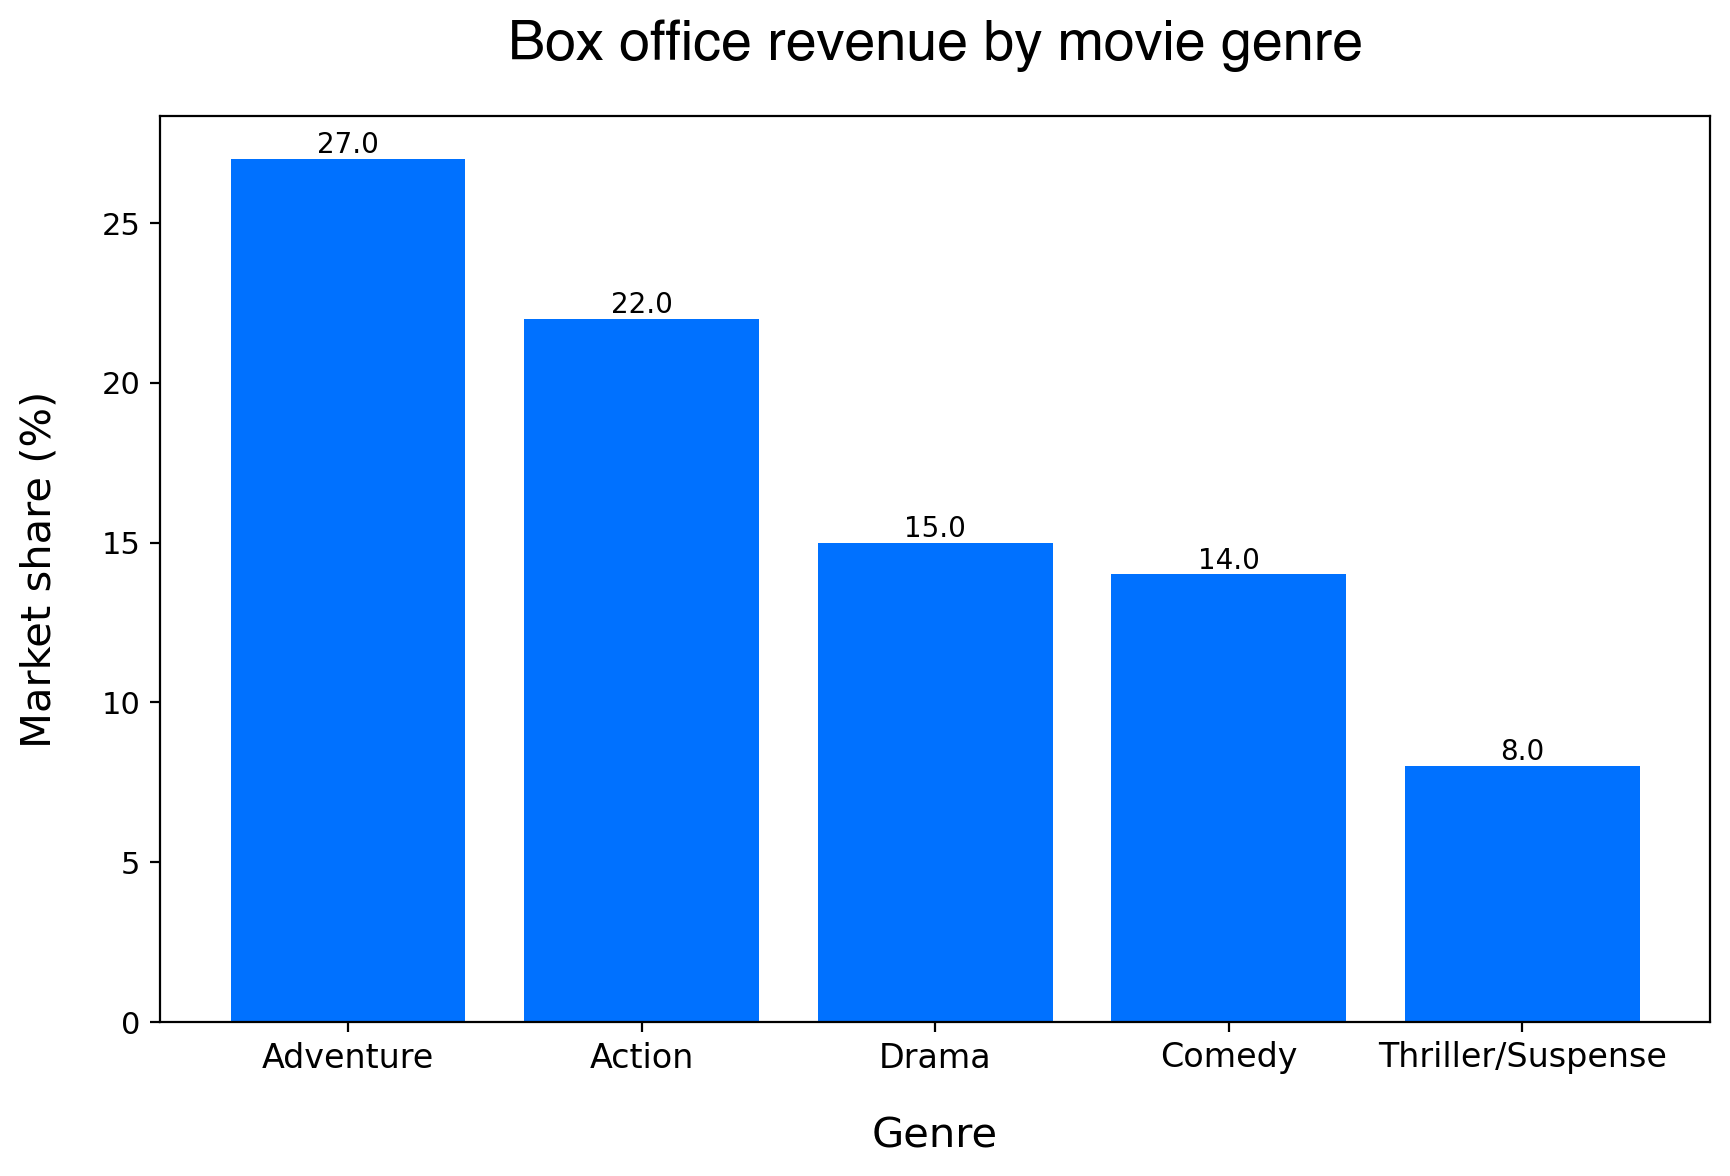

In [230]:
import matplotlib.pyplot as plt
import numpy as np

# creating x and y
x = genre_data_sorted['Genre']
y = genre_data_sorted['Share']

# resizing & design
fig = plt.figure(figsize=(10, 6))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=11)
rfont = {'fontname':'helvetica'}

# setting labels
plt.title('Box office revenue by movie genre',**rfont, fontdict = {'fontsize' : 20, 'fontweight': 100} , pad = 20
         )
plt.xlabel('Genre',labelpad = 15, fontdict = {'fontsize' : 15} )
plt.ylabel('Market share (%)', labelpad = 15, fontdict = {'fontsize' : 15})

# making the bar
genre_graph = plt.bar(x, y,color=('#0071ff'))

for bar in genre_graph:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')
;